## Data Driven Business 01: Predictive analytics for a taxi company

## Learning Objectives

* Clean data in Pandas
* Descriptive analytics amd explanatory analysis: 
    * grouping data
    * visualization via box plots, scatter plots, histograms, and heat maps
* Predictive analytics using regression
* Derive insights from a business analytics point of view

## Case Background

A Chicago taxi company has hired your small accounting and consulting firm to help them shave costs and increase revenues. Like many traditional cab companies, Yellow Cab is feeling significant pressure from ride-hailing companies like Lyft and Uber. 

The Chicago Taxi company client tells you: "I heard that you have some data analytics skills. I would like you to see if you there is any data out there that might help us learn more about the situation taxis are in and if there are any interesting revenue opportunities out there that we have not thought of. Where should we be focusing their efforts?"

The city of Chicago puts a bunch of data out there about cab trips. This is just what you need!
 
You may find more information about the data here: https://data.cityofchicago.org/Transportation/Taxi-Trips/wrvz-psew 


Data explanation: Taxi trips reported to the City of Chicago in its role as a regulatory agency. To protect privacy but allow for aggregate analyses, the Taxi ID is consistent for any given taxi medallion number but does not show the number, Census Tracts are suppressed in some cases, and times are rounded to the nearest 15 minutes.

## Load Relevant Packages and Dependencies

Set up the environment, load packages and dependencies.

In [17]:
import pandas as pd 
import numpy as np 
# to show graphs inline
%matplotlib inline 

In [18]:
file = 'Taxi_Trips_october.csv'
# Load data for use
df = pd.read_csv(file)

In [19]:
df

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Community Areas
0,fec0bcfe5f07e87025658c16baabc2b80532b8e5,d72104d59ef45d3ecb85925a234e9366c59ab32d9751d1...,11/01/2023 12:00:00 AM,11/01/2023 11:30:00 AM,41490.0,17.39,NaN,NaN,76.0,2.0,...,70.25,Cash,City Service,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),42.001571,-87.695013,POINT (-87.6950125892 42.001571027),75.0
1,f2ac00055859e815cd07f95f7cd51b70cb0a079e,3b443d58fee461cd803cdf9a032f474964aabb042fc5f6...,11/01/2023 12:00:00 AM,11/01/2023 12:45:00 AM,2964.0,37.24,NaN,NaN,76.0,76.0,...,92.25,Cash,City Service,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.980264,-87.913625,POINT (-87.913624596 41.9802643146),75.0
2,e99f9b320b01baacf3fe76f1b1ddedfa6415789a,c57508f365f1bdac3be5e7de12fb19c8d669c37d515e41...,11/01/2023 12:00:00 AM,11/01/2023 12:30:00 AM,1918.0,14.37,1.703198e+10,NaN,76.0,NaN,...,73.75,Credit Card,5 Star Taxi,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),NaN,NaN,NaN,75.0
3,e27bb55058db7e31b9abe9f561ca1f83463b9c50,04b96cbbdcfe5b7cbb6884bc1b922819466f652662ead8...,11/01/2023 12:00:00 AM,11/01/2023 12:15:00 AM,1547.0,13.67,NaN,NaN,13.0,5.0,...,47.40,Mobile,5 Star Taxi,41.983636,-87.723583,POINT (-87.7235831853 41.9836363072),41.947792,-87.683835,POINT (-87.6838349425 41.9477915865),13.0
4,dd4e82f678682c3e92897d44dfb5e917d3e8d245,78893d83a12762723e5a8ef770b3fb541e9b2cd8d4316d...,11/01/2023 12:00:00 AM,11/01/2023 12:15:00 AM,1140.0,11.80,NaN,NaN,7.0,69.0,...,30.00,Unknown,Choice Taxi Association,41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),41.763247,-87.616134,POINT (-87.6161341112 41.7632467988),68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591017,f5c41d52512e0bc0412e003488d33ce0a63f832d,bcda8c3cc4c7917b5e59fdbda4a08b57312fd55f6cb3cf...,10/01/2023 11:45:00 PM,10/02/2023 12:00:00 AM,553.0,2.33,NaN,NaN,22.0,24.0,...,9.00,Mobile,Star North Taxi Management Llc,41.922761,-87.699155,POINT (-87.6991553432 41.9227606205),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941),23.0
591018,f93f2cdc1ef4b78c7e259bf2137f899a31adaf33,158bdb99c0944908e89681ab608203e360f6e359ad4d94...,10/01/2023 11:45:00 PM,10/02/2023 12:15:00 AM,1840.0,20.29,1.703198e+10,1.703132e+10,76.0,32.0,...,56.25,Cash,Flash Cab,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.870607,-87.622173,POINT (-87.6221729369 41.8706073724),75.0
591019,f7b04bf04191f558c700c1242bd0e8ff3fc62b17,8a579afa6df0914d872dac898a493e2d6c36acbe25b73f...,10/01/2023 11:45:00 PM,10/01/2023 11:45:00 PM,0.0,0.00,1.703198e+10,1.703198e+10,76.0,76.0,...,7.25,Cash,"Taxicab Insurance Agency, LLC",41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),75.0
591020,fc12f27571c5cebd7b60c9ddb3f5bb9757672dae,f75191fdf728d7ed7f4277ee1e39372c16658b87abc26a...,10/01/2023 11:45:00 PM,10/01/2023 11:45:00 PM,540.0,3.30,1.703198e+10,1.703198e+10,76.0,76.0,...,18.10,Credit Card,Chicago Independents,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),75.0


## 1. Clean Data


Perform some data operations on the dataframe such that unreasonable trip rows are eliminated.
- Delete trips with NaN mileage and NaN seconds.
- Delete trips with no cost, since these are mistakes or uninteresting cases
- Delete trips with no mileage but starting and stopping in a different community, since these are likely mistakes.
- Delete trips with no seconds but starting and stopping in a different community, since these are likely mistakes.

In [20]:
# Data Cleaning
# Remove rows with NaN values in 'Trip Miles' or 'Trip Seconds'
df_cleaned = df.dropna(subset=['Trip Miles', 'Trip Seconds'])

# Remove rows where 'Trip Total' is 0
df_cleaned = df_cleaned[df_cleaned['Trip Total'] > 0]

# Remove rows with zero mileage but different pickup and dropoff areas
df_cleaned = df_cleaned[~((df_cleaned['Trip Miles'] == 0) & 
                          (df_cleaned['Pickup Community Area'] != df_cleaned['Dropoff Community Area']))]

# Remove rows with zero seconds but different pickup and dropoff areas
df_cleaned = df_cleaned[~((df_cleaned['Trip Seconds'] == 0) & 
                          (df_cleaned['Pickup Community Area'] != df_cleaned['Dropoff Community Area']))]

# Display the cleaned dataset
print(df_cleaned.head())

                                    Trip ID  \
0  fec0bcfe5f07e87025658c16baabc2b80532b8e5   
1  f2ac00055859e815cd07f95f7cd51b70cb0a079e   
2  e99f9b320b01baacf3fe76f1b1ddedfa6415789a   
3  e27bb55058db7e31b9abe9f561ca1f83463b9c50   
4  dd4e82f678682c3e92897d44dfb5e917d3e8d245   

                                             Taxi ID    Trip Start Timestamp  \
0  d72104d59ef45d3ecb85925a234e9366c59ab32d9751d1...  11/01/2023 12:00:00 AM   
1  3b443d58fee461cd803cdf9a032f474964aabb042fc5f6...  11/01/2023 12:00:00 AM   
2  c57508f365f1bdac3be5e7de12fb19c8d669c37d515e41...  11/01/2023 12:00:00 AM   
3  04b96cbbdcfe5b7cbb6884bc1b922819466f652662ead8...  11/01/2023 12:00:00 AM   
4  78893d83a12762723e5a8ef770b3fb541e9b2cd8d4316d...  11/01/2023 12:00:00 AM   

       Trip End Timestamp  Trip Seconds  Trip Miles  Pickup Census Tract  \
0  11/01/2023 11:30:00 AM       41490.0       17.39                  NaN   
1  11/01/2023 12:45:00 AM        2964.0       37.24                  NaN   
2  11/01

In [21]:
# Check for NaN values in the cleaned data
nan_check = df_cleaned[['Trip Miles', 'Trip Seconds']].isna().sum()
print("Number of NaN values in Trip Miles and Trip Seconds after cleaning:")
print(nan_check)


Number of NaN values in Trip Miles and Trip Seconds after cleaning:
Trip Miles      0
Trip Seconds    0
dtype: int64


### Fix datetime

Create a new column that converts `trip_start_timestamp` and `trip_end_timestamp` to a datetime object. Create two new columns - for the  day and hour, use the start of the trip, since that is something the taxi driver can control)

In [22]:
# Convert 'Trip Start Timestamp' and 'Trip End Timestamp' to datetime objects
df_cleaned['Trip Start Timestamp'] = pd.to_datetime(df_cleaned['Trip Start Timestamp'], format='%m/%d/%Y %I:%M:%S %p')
df_cleaned['Trip End Timestamp'] = pd.to_datetime(df_cleaned['Trip End Timestamp'], format='%m/%d/%Y %I:%M:%S %p')

# Create a new column for the day of the trip (day of the week)
df_cleaned['day'] = df_cleaned['Trip Start Timestamp'].dt.day_name()

# Create a new column for the hour of the trip (hour of the day)
df_cleaned['hour'] = df_cleaned['Trip Start Timestamp'].dt.hour

# Display the updated DataFrame
print(df_cleaned[['Trip Start Timestamp', 'Trip End Timestamp', 'day', 'hour']].head())


  Trip Start Timestamp  Trip End Timestamp        day  hour
0           2023-11-01 2023-11-01 11:30:00  Wednesday     0
1           2023-11-01 2023-11-01 00:45:00  Wednesday     0
2           2023-11-01 2023-11-01 00:30:00  Wednesday     0
3           2023-11-01 2023-11-01 00:15:00  Wednesday     0
4           2023-11-01 2023-11-01 00:15:00  Wednesday     0


### Deal with outliers

The main focus in outliers is getting `trip_total` right, since you are trying to understand how a company can make money. `trip_seconds` and `trip_duration` also have outliers, which you should look at, but we will focus on `trip_total` and `tips`.

First, draw box plots of those four variables to see how significant the outlier situation is

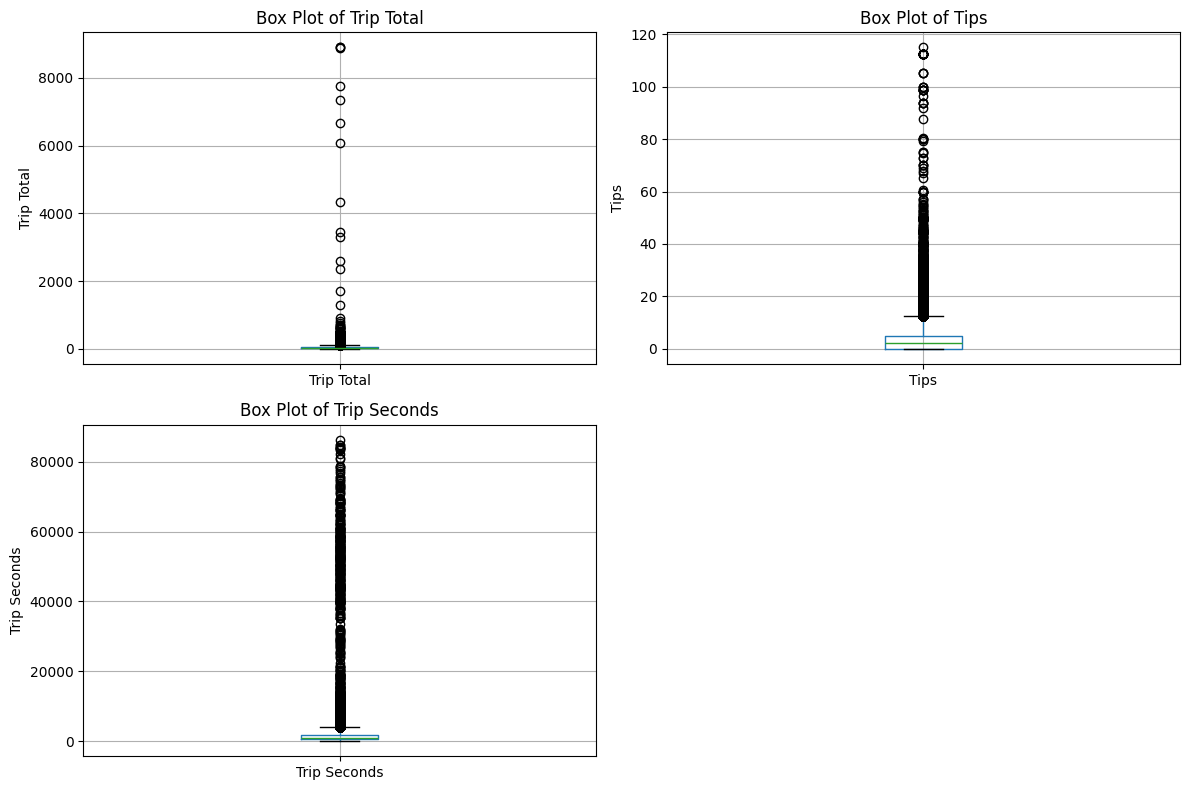

In [23]:
import matplotlib.pyplot as plt

# Select relevant columns for analysis
columns_to_plot = ['Trip Total', 'Tips', 'Trip Seconds']

# Create box plots
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(2, 2, i)
    df_cleaned.boxplot(column=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


Next, draw two scatter plots to see how cost and miles and cost and seconds relate to each other.

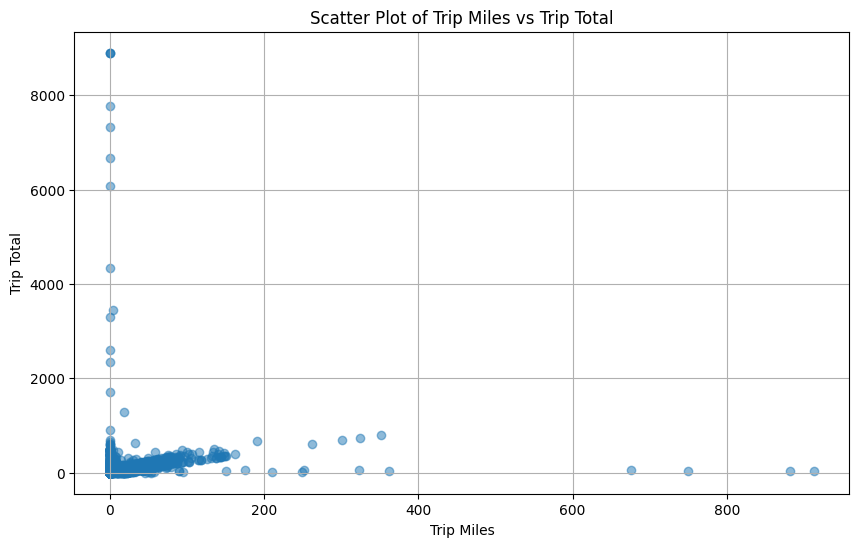

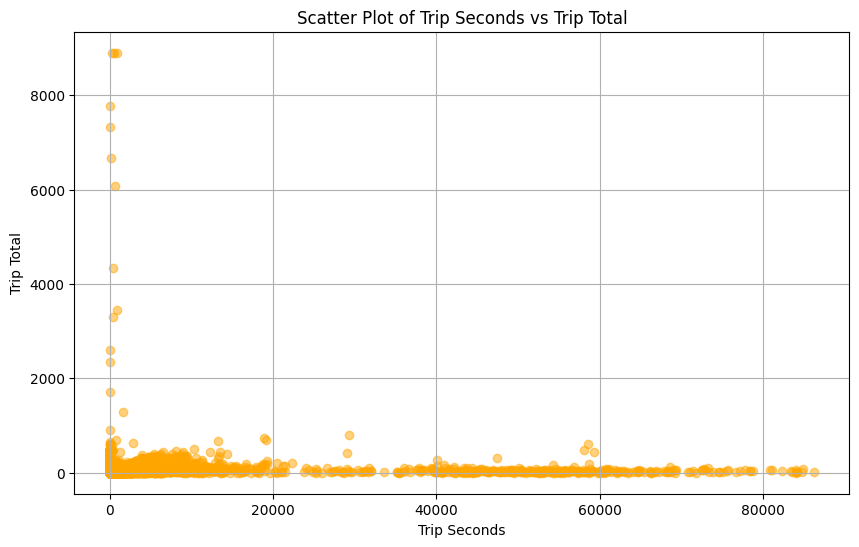

In [24]:

# Scatter plot for cost and miles
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Trip Miles'], df_cleaned['Trip Total'], alpha=0.5)
plt.title('Scatter Plot of Trip Miles vs Trip Total')
plt.xlabel('Trip Miles')
plt.ylabel('Trip Total')
plt.grid(True)
plt.show()

# Scatter plot for cost and seconds
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Trip Seconds'], df_cleaned['Trip Total'], alpha=0.5, color='orange')
plt.title('Scatter Plot of Trip Seconds vs Trip Total')
plt.xlabel('Trip Seconds')
plt.ylabel('Trip Total')
plt.grid(True)
plt.show()


Question: <br>
These plots indicate that most very high cost trips are probably errors or uninteresting since they have took very few seconds and went very few miles. For example, it does not seem plausible that a $8,000 cab fare took went about 0 miles and took about 0 seconds. 

Let's correct this by eliminating rows with unusually high dollars (i.e., trip with unreasonably low seconds or low mileage but high payment).

In [25]:
# Define thresholds for reasonable trips
miles_threshold = 1  # Minimum distance in miles
seconds_threshold = 300  # Minimum duration in seconds
max_fare_reasonable = 500  # Maximum reasonable trip total

# Filter the data
df_cleaned_filtered = df_cleaned[~(
    (df_cleaned['Trip Total'] > max_fare_reasonable) & 
    ((df_cleaned['Trip Miles'] < miles_threshold) | (df_cleaned['Trip Seconds'] < seconds_threshold))
)]

# Check the shape of the dataset before and after filtering
print(f"Original dataset size: {df_cleaned.shape}")
print(f"Filtered dataset size: {df_cleaned_filtered.shape}")


Original dataset size: (561374, 26)
Filtered dataset size: (561355, 26)


Next, rerun the two scatterplots from above to visually inspect whether this worked. 

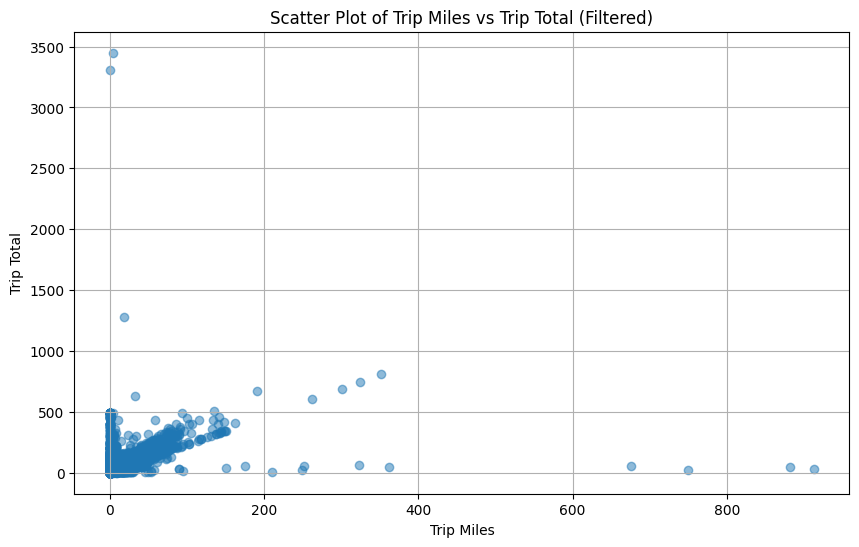

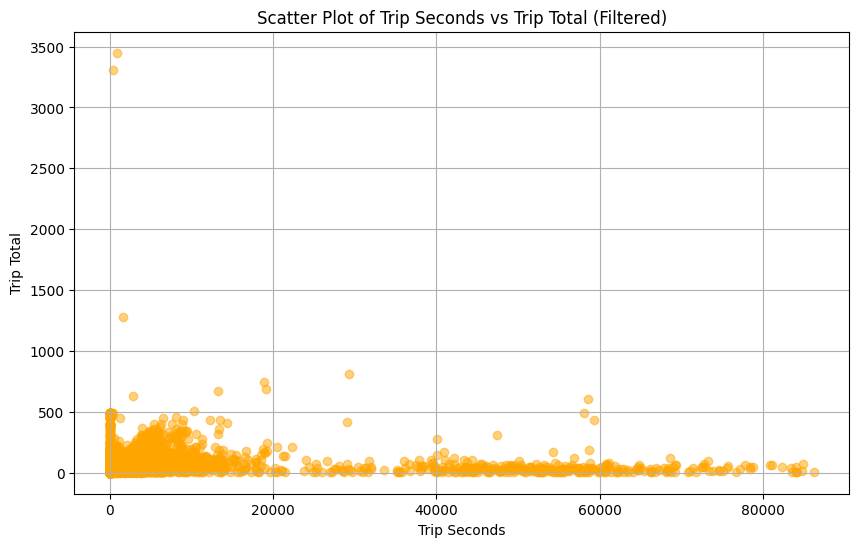

In [26]:

# Scatter plot for cost and miles (filtered data)
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned_filtered['Trip Miles'], df_cleaned_filtered['Trip Total'], alpha=0.5)
plt.title('Scatter Plot of Trip Miles vs Trip Total (Filtered)')
plt.xlabel('Trip Miles')
plt.ylabel('Trip Total')
plt.grid(True)
plt.show()

# Scatter plot for cost and seconds (filtered data)
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned_filtered['Trip Seconds'], df_cleaned_filtered['Trip Total'], alpha=0.5, color='orange')
plt.title('Scatter Plot of Trip Seconds vs Trip Total (Filtered)')
plt.xlabel('Trip Seconds')
plt.ylabel('Trip Total')
plt.grid(True)
plt.show()


## 2. Descriptive Analytics

Next, explore the data using descriptive analytics. Graph the number of trips by day of the week, and by hour of the day. 


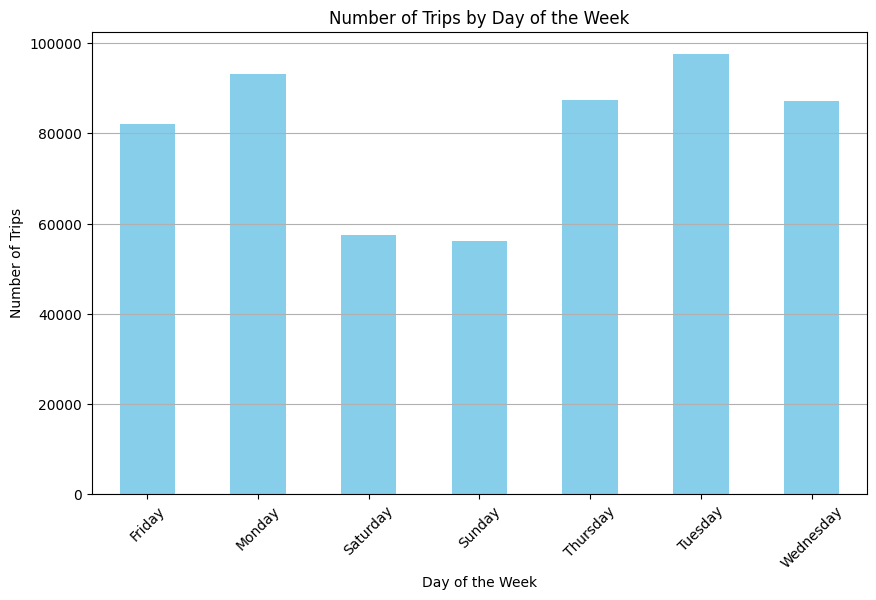

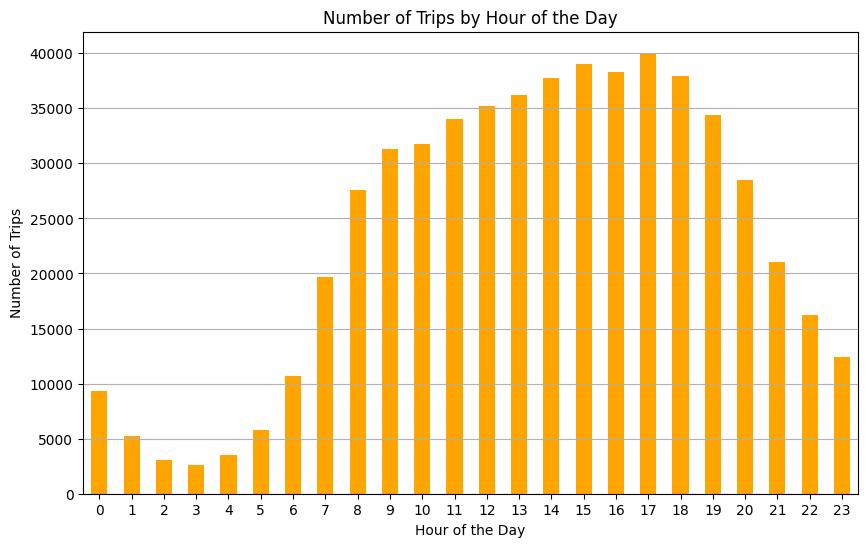

In [27]:

# Number of trips by day of the week
trips_by_day = df_cleaned_filtered['day'].value_counts().sort_index()  # Sort by day order
plt.figure(figsize=(10, 6))
trips_by_day.plot(kind='bar', color='skyblue')
plt.title('Number of Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Number of trips by hour of the day
trips_by_hour = df_cleaned_filtered['hour'].value_counts().sort_index()  # Sort by hour order
plt.figure(figsize=(10, 6))
trips_by_hour.plot(kind='bar', color='orange')
plt.title('Number of Trips by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


#### Costs and tips by pick-up community area

Graph on a histogram the top 20 community areas to pick up in if you want to maximize total cost and tips. Thus, two graphs are required. Can you draw any useful conclusions from this analysis?

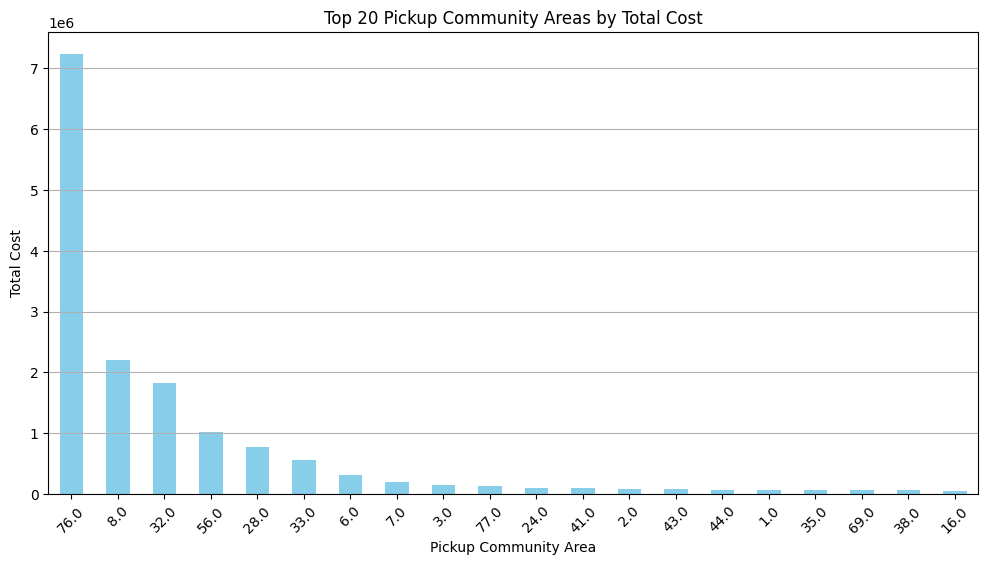

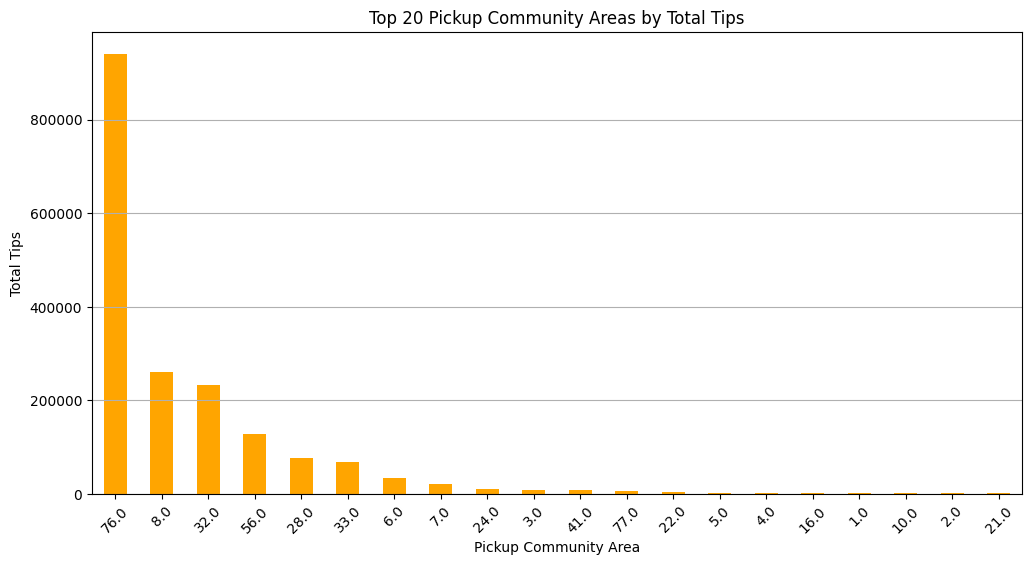

In [28]:

# Total cost by pickup community area
top_20_cost_areas = (
    df_cleaned_filtered.groupby('Pickup Community Area')['Trip Total']
    .sum()
    .nlargest(20)
)

plt.figure(figsize=(12, 6))
top_20_cost_areas.plot(kind='bar', color='skyblue')
plt.title('Top 20 Pickup Community Areas by Total Cost')
plt.xlabel('Pickup Community Area')
plt.ylabel('Total Cost')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Tips by pickup community area
top_20_tips_areas = (
    df_cleaned_filtered.groupby('Pickup Community Area')['Tips']
    .sum()
    .nlargest(20)
)

plt.figure(figsize=(12, 6))
top_20_tips_areas.plot(kind='bar', color='orange')
plt.title('Top 20 Pickup Community Areas by Total Tips')
plt.xlabel('Pickup Community Area')
plt.ylabel('Total Tips')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


#### Costs and tips by means of payment

Graph the mean of the total cost and tips by type of payment. Thus, two graphs are required. Can you draw any useful conclusions from this analysis?

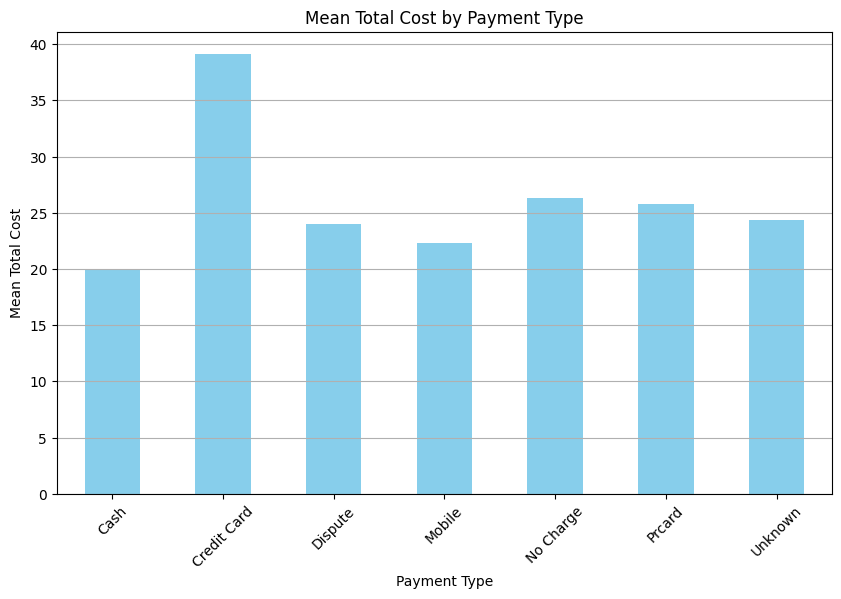

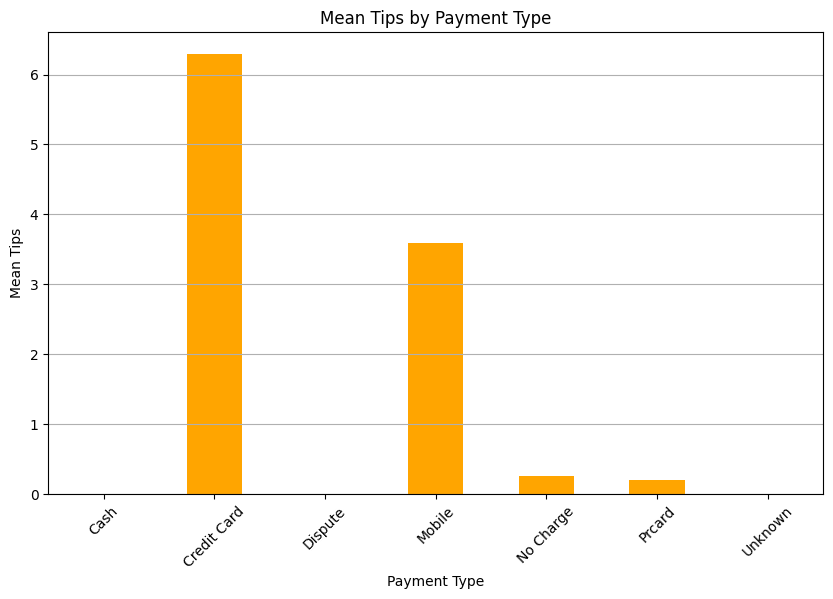

In [29]:

# Mean of total cost by payment type
mean_cost_by_payment = df_cleaned_filtered.groupby('Payment Type')['Trip Total'].mean()

plt.figure(figsize=(10, 6))
mean_cost_by_payment.plot(kind='bar', color='skyblue')
plt.title('Mean Total Cost by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Mean Total Cost')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Mean of tips by payment type
mean_tips_by_payment = df_cleaned_filtered.groupby('Payment Type')['Tips'].mean()

plt.figure(figsize=(10, 6))
mean_tips_by_payment.plot(kind='bar', color='orange')
plt.title('Mean Tips by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Mean Tips')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


#### Visualizing tips and total bill by location

Next, explore some of the geographical characteristics of the data. Graph the data based upon latitude and longitude. Use the pick-up location, since this is something the driver can control. Use built in features of a Python package (e.g., pyplot from matplotlib) to also see the total bill and the tip amount on this graph. (Hint: outliers will skew the graph, look at trips under $50.) What conclusions can be drawn from this analysis?

**Extra**: If you are really advanced python user, you can try to overlay a Chicago city map and build a nice visualization tool

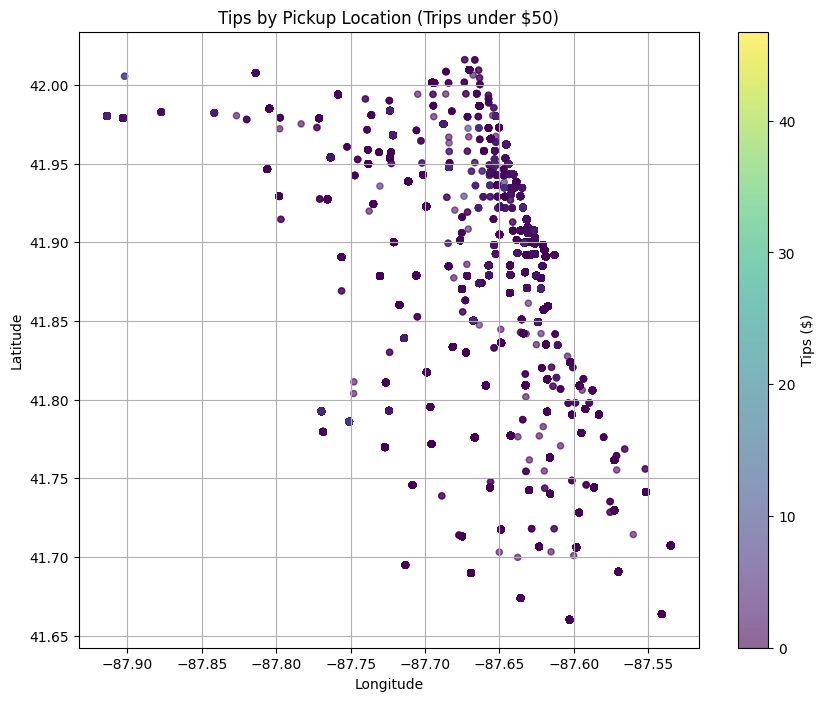

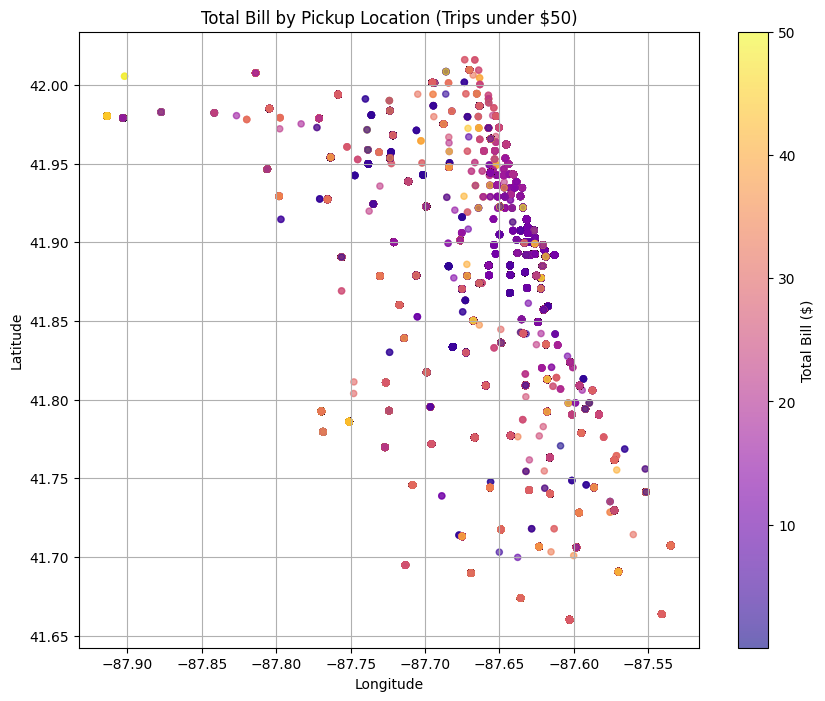

In [30]:

# Filter data for trips under $50
df_filtered = df_cleaned_filtered[df_cleaned_filtered['Trip Total'] <= 50]

# Scatter plot for tips by pickup location
plt.figure(figsize=(10, 8))
plt.scatter(df_filtered['Pickup Centroid Longitude'], df_filtered['Pickup Centroid Latitude'], 
            c=df_filtered['Tips'], cmap='viridis', alpha=0.6, s=20)
plt.colorbar(label='Tips ($)')
plt.title('Tips by Pickup Location (Trips under $50)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Scatter plot for total bill by pickup location
plt.figure(figsize=(10, 8))
plt.scatter(df_filtered['Pickup Centroid Longitude'], df_filtered['Pickup Centroid Latitude'], 
            c=df_filtered['Trip Total'], cmap='plasma', alpha=0.6, s=20)
plt.colorbar(label='Total Bill ($)')
plt.title('Total Bill by Pickup Location (Trips under $50)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


## 3. Predictive Analytics - Regression
----------

### Two Basic Regressions

With data points available for certain values, we can build a more general predictive model using linear regression ($y = A_0x_+\epsilon$). A linear regression model makes a few key assumptions:

- Features are linearly independent of each other.
- Errors in the regression are normally distributed (rather than biased).
- Effects are linear functions of inputs.


The model $y$ is an effect or response produced by the features, the predictors, or the values (all meaning more or less the same thing to us). If only one feature $x_1$ is used, this is a simple linear regression; if more than one feature is used, as above, then this is a multiple linear regression.

Linear regression is actually implemented several times in Python libraries


Use regression to examine the factors that are predictive of the total bill and tips. What does this analysis tell you?

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data for regression (use numerical columns only)
features = ['Trip Miles', 'Trip Seconds', 'Pickup Community Area']
target_total = 'Trip Total'
target_tips = 'Tips'

# Drop rows with missing or non-numeric values in the features/targets
df_regression = df_cleaned_filtered.dropna(subset=features + [target_total, target_tips])

# Split data into training and testing sets for total bill
X_total = df_regression[features]
y_total = df_regression[target_total]
X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(X_total, y_total, test_size=0.2, random_state=42)

# Fit linear regression model for total bill
model_total = LinearRegression()
model_total.fit(X_train_total, y_train_total)

# Predict on test data
y_pred_total = model_total.predict(X_test_total)

# Evaluate model for total bill
print("Total Bill Regression:")
print("Coefficients:", model_total.coef_)
print("Intercept:", model_total.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test_total, y_pred_total))
print("R-squared:", r2_score(y_test_total, y_pred_total))

# Split data into training and testing sets for tips
X_tips = df_regression[features]
y_tips = df_regression[target_tips]
X_train_tips, X_test_tips, y_train_tips, y_test_tips = train_test_split(X_tips, y_tips, test_size=0.2, random_state=42)

# Fit linear regression model for tips
model_tips = LinearRegression()
model_tips.fit(X_train_tips, y_train_tips)

# Predict on test data
y_pred_tips = model_tips.predict(X_test_tips)

# Evaluate model for tips
print("\nTips Regression:")
print("Coefficients:", model_tips.coef_)
print("Intercept:", model_tips.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test_tips, y_pred_tips))
print("R-squared:", r2_score(y_test_tips, y_pred_tips))



Total Bill Regression:
Coefficients: [1.96552072e+00 1.37587309e-03 2.01952147e-01]
Intercept: 5.954553221834093
Mean Squared Error: 311.1302831020667
R-squared: 0.54837640575282

Tips Regression:
Coefficients: [2.02779877e-01 7.28736609e-05 3.81404461e-02]
Intercept: 0.3583881065777077
Mean Squared Error: 14.750294203264401
R-squared: 0.25776414576896567


###  Extra: Tell a story

Finally, use the previous exploratory and predictive modeling analysis, to make recommendations to your supervisor from the Chicago taxi company client.

#Strategic Allocation of Resources:

Position drivers in high-demand pickup areas during peak hours and weekends to capitalize on busy periods.
Focus marketing efforts in these areas to attract repeat customers.
Improve Tipping Behavior:

Promote the use of credit cards as a preferred payment method to encourage higher tips.
Implement optional tipping suggestions in payment interfaces for all payment methods.
Dynamic Pricing:

Introduce dynamic pricing during peak hours and in high-demand areas to maximize revenue.
Regularly review fare structures to ensure fairness and competitiveness with ride-hailing services.
Data Quality Control:

Regularly audit data for outliers and anomalies, such as trips with very high costs and low mileage, to ensure accurate billing and pricing.
Driver Training:

Train drivers to optimize routes and customer service to enhance customer satisfaction and increase tips.
Provide incentives for drivers operating during peak hours or in high-demand areas.
Customer Retention:

Launch loyalty programs to retain frequent customers, especially those in high-earning locations.
Offer discounts or rewards for longer trips or repeat usage.
